In [4]:
#visualisasi hasil ConvexHull
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
data = datasets.load_wine() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
def myConvexHull(sorted_arr):
    #sort the array
    p1 = 0
    pn = len(sorted_arr)-1

    #list index titik di sorted_arr yang bisa jadi convexhull
    toBeHull = []

    #eliminate index titik yang gamungkin convexhull (karena di garis p1pn)
    i = 1
    while(i != len(sorted_arr)-1):
        right = (sorted_arr[pn][1]-sorted_arr[p1][1])*(sorted_arr[i][0] - sorted_arr[p1][0])
        left = (sorted_arr[pn][0]-sorted_arr[p1][0])*(sorted_arr[i][1] - sorted_arr[p1][1])
        if(right != left):
            toBeHull.append(int(i))
        i += 1
    
    #sort list
    toBeHull.sort()
    #tentuin kanan kiri
    s1 = [] #di kiri
    s2 = [] #di kanan
    s1 = diKiri(p1, pn, toBeHull, sorted_arr)
    s2 = diKiri(pn, p1, toBeHull, sorted_arr)
    # inisialisasi array titik solusi
    S = [0, len(sorted_arr)-1]
    fh1 = findHull(s1, p1, pn, sorted_arr)
    fh2 = findHull(s2, pn, p1, sorted_arr)
    # jika hasil fungsi tidak ada maka tidak akan ditambahkan dalam array solusi
    if fh1 != None:
        S += fh1
    if fh2 != None:
        S += fh2

    # inisialisasi array sebelah kiri (S1) dan kanan (S2)
    S1 = []
    S2 = []
    for i in S:
        if isDiKiri(p1, pn, i, sorted_arr) and i != p1 and i != pn:
            S1.append(i)
        elif isDiKiri(pn, p1, i, sorted_arr) and i != p1 and i != pn:
            S2.append(i)
    S1.sort()
    S2.sort()

    #inisialisasi array solusi final dengan titik p1 ke titik pertama di S1
    #agar array final berisi kumpulan array of index yang menggambarkan ujung garis-garis
    Sf = [[p1, S1[0]]]
    Sf.append([p1, S2[0]])
    for i in range(len(S1)-1):
        Sf.append([S1[i], S1[i+1]])
    for i in range(len(S2)-1):
        Sf.append([S2[i], S2[i+1]])
    Sf.append([S1[-1], pn])
    Sf.append([S2[-1], pn])
    return Sf

#cari Hullnya    
def findHull(s, p1, pn, sorted_arr):
    if len(s) == 0:
        return s
    else:
        terjauh = titikTerjauh(s, p1, pn, sorted_arr)
        S11 = diKiri(p1, terjauh, s, sorted_arr)
        S12 = diKiri(terjauh, pn, s, sorted_arr)
        fs = [terjauh]
        fh1 = findHull(S11, p1, terjauh, sorted_arr)
        fh2 = findHull(S12, terjauh, pn, sorted_arr)
        if fh1 != None:
            fs += fh1
        if fh2 != None:
            fs += fh2
        return fs

# untuk membagi titik di kanan dan kiri garis p1pn 
def diKiri(p1, pn, toBeHull, sorted_arr):
    s1 = [] #di kiri
    for i in toBeHull:
        if isDiKiri(p1, pn, i, sorted_arr) and not(isInLine(p1, pn, i, sorted_arr)): #kalau ada di kiri garis dan ga di garis
            s1.append(i)
    return s1

#cari terjauh
def titikTerjauh(s, p1, pn, sorted_arr):
    p1 = np.asarray(sorted_arr[p1])
    pn = np.asarray(sorted_arr[pn])
    pmax = -1
    dmax = -1
    for i in s:
        d = np.abs(np.cross(pn-p1, p1-sorted_arr[i])) / np.linalg.norm(pn-p1)
        if d > dmax:
            dmax = d
            pmax = i
    return pmax

def isInLine(p1, pn, checked, sorted_arr):
    right = (sorted_arr[pn][1]-sorted_arr[p1][1])*(sorted_arr[checked][0] - sorted_arr[p1][0])
    left = (sorted_arr[pn][0]-sorted_arr[p1][0])*(sorted_arr[checked][1] - sorted_arr[p1][1])
    if(right == left):
        return True
    return False

def isDiKiri(p1, pn, checked, sorted_arr):
    det = (sorted_arr[p1][0]*sorted_arr[pn][1]) + (sorted_arr[checked][0]*sorted_arr[p1][1]) + (sorted_arr[pn][0]*sorted_arr[checked][1]) - (sorted_arr[checked][0]*sorted_arr[pn][1]) - (sorted_arr[pn][0]*sorted_arr[p1][1]) - (sorted_arr[p1][0]*sorted_arr[checked][1])
    if det > 0:
        return True
    return False

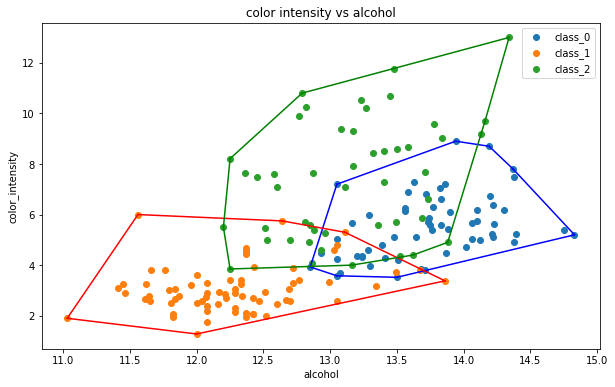

In [7]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('color intensity vs alcohol')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[9])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,9]].values
    bucket = bucket[np.lexsort((bucket[:, 1], (bucket[:,0])))]
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()